## 0. Packages and Datasets Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, boxcox, yeojohnson
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import zscore 


In [3]:
df_original = pd.read_csv('../Data/digital_marketing_campaign_dataset.csv')

## 1. EDA 

In [4]:
df_original.head(5)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


from data source, data card
Demographic Information

CustomerID: Unique identifier for each customer.
Age: Age of the customer.
Gender: Gender of the customer (Male/Female).
Income: Annual income of the customer in USD.
Marketing-specific Variables

CampaignChannel: The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral).
CampaignType: Type of the marketing campaign (Awareness, Consideration, Conversion, Retention).
AdSpend: Amount spent on the marketing campaign in USD.
ClickThroughRate: Rate at which customers click on the marketing content.
ConversionRate: Rate at which clicks convert to desired actions (e.g., purchases).
AdvertisingPlatform: Confidential.
AdvertisingTool: Confidential.
Customer Engagement Variables

WebsiteVisits: Number of visits to the website.
PagesPerVisit: Average number of pages visited per session.
TimeOnSite: Average time spent on the website per visit (in minutes).
SocialShares: Number of times the marketing content was shared on social media.
EmailOpens: Number of times marketing emails were opened.
EmailClicks: Number of times links in marketing emails were clicked.
Historical Data

PreviousPurchases: Number of previous purchases made by the customer.
LoyaltyPoints: Number of loyalty points accumulated by the customer.
Target Variable

Conversion: Binary variable indicating whether the customer converted (1) or not (0).

In [5]:
df_original.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [6]:
num_rows, num_cols = df_original.shape
print('df has {} rows and {} columns'.format(num_rows, num_cols))

df has 8000 rows and 20 columns


In [7]:
def print_column_info(df):
    col_info = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes.values,
        'Unique Values': [df[col].nunique() for col in df.columns]
    })
    print(col_info)

print_column_info(df_original)

            Column Name Data Type  Unique Values
0            CustomerID     int64           8000
1                   Age     int64             52
2                Gender    object              2
3                Income     int64           7789
4       CampaignChannel    object              5
5          CampaignType    object              4
6               AdSpend   float64           8000
7      ClickThroughRate   float64           8000
8        ConversionRate   float64           8000
9         WebsiteVisits     int64             50
10        PagesPerVisit   float64           8000
11           TimeOnSite   float64           8000
12         SocialShares     int64            100
13           EmailOpens     int64             20
14          EmailClicks     int64             10
15    PreviousPurchases     int64             10
16        LoyaltyPoints     int64           3983
17  AdvertisingPlatform    object              1
18      AdvertisingTool    object              1
19           Convers

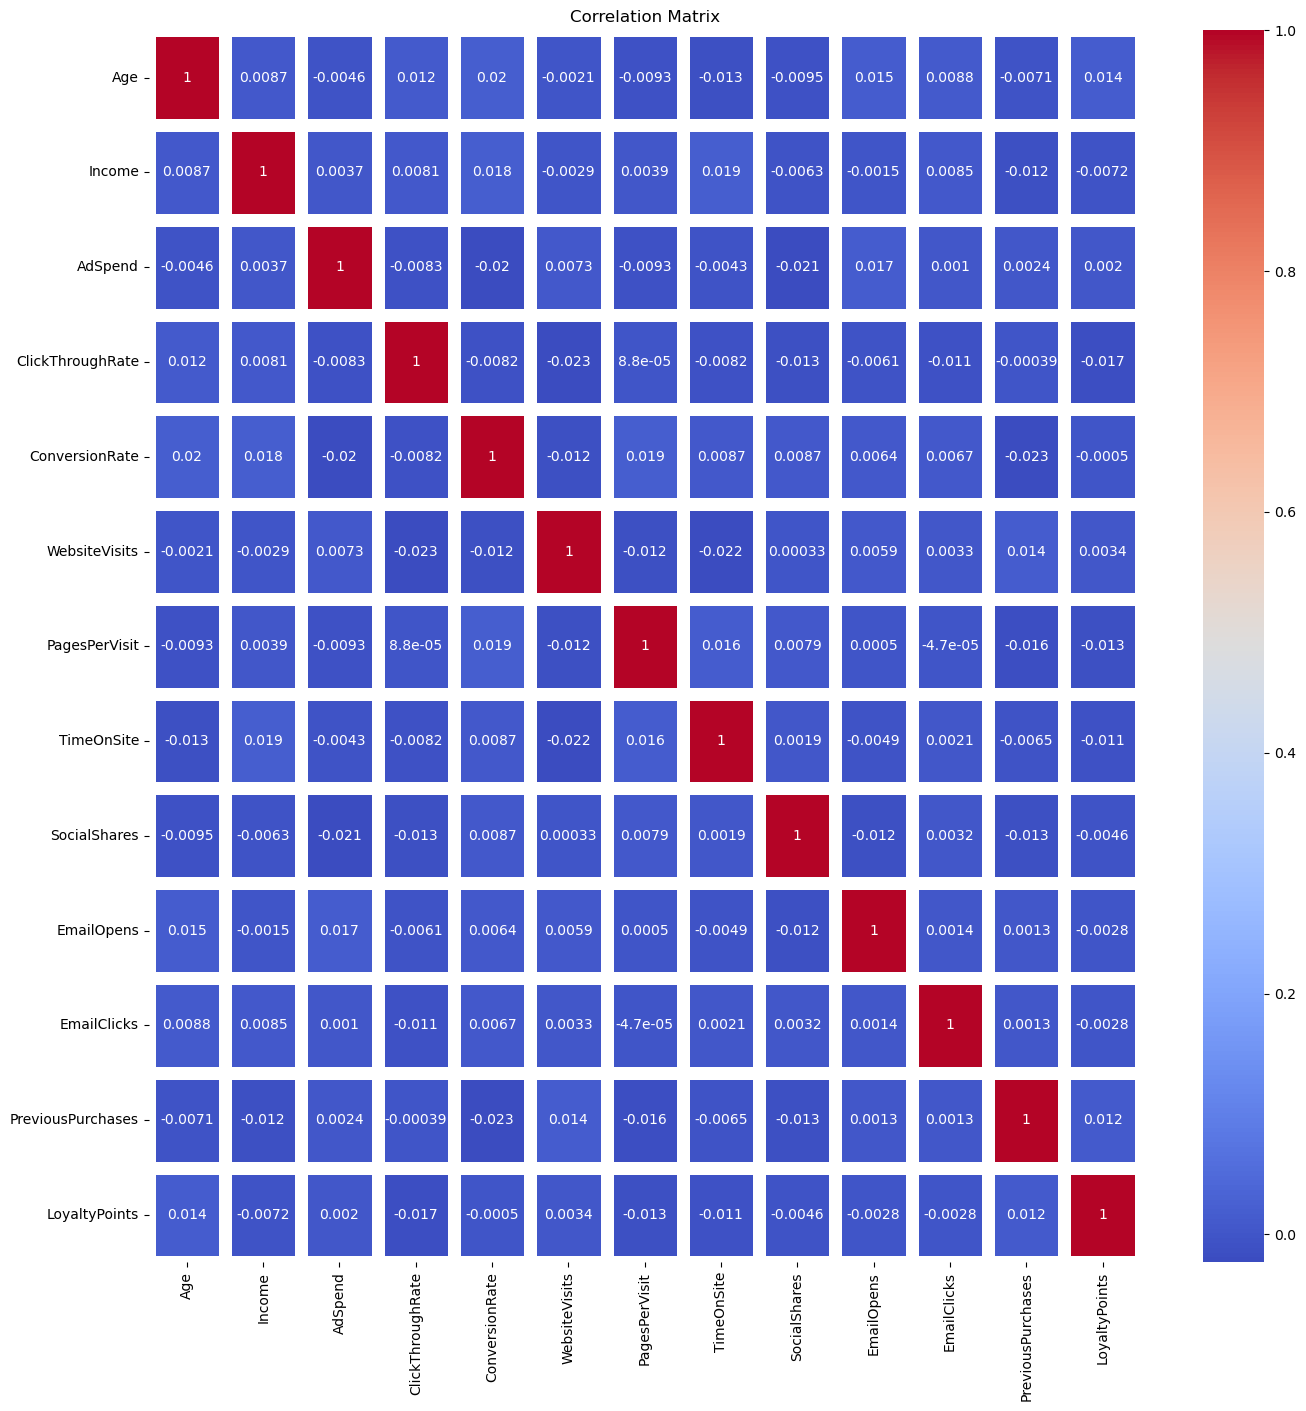

In [8]:
# Define the list of numerical columns
numerical_cols = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 
                  'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 
                  'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']

# Create a new DataFrame containing only the numerical columns
df_numerical = df_original[numerical_cols]


corr_matrix = df_numerical.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths= 8)
plt.title('Correlation Matrix')
plt.show()

## 2. Data Cleaning


### 2.1 Removing Columns that does not contribute to segmentation

columns 'AdvertisingPlatform', 'AdvertisingTool' only have one unique value for all rows and Customer ID also does not contribute to segmentation, so I dropped these columns here

In [9]:
df_drop = df_original.drop(columns = ['AdvertisingPlatform', 'AdvertisingTool','CustomerID'])

In [10]:
print_column_info(df_drop)

          Column Name Data Type  Unique Values
0                 Age     int64             52
1              Gender    object              2
2              Income     int64           7789
3     CampaignChannel    object              5
4        CampaignType    object              4
5             AdSpend   float64           8000
6    ClickThroughRate   float64           8000
7      ConversionRate   float64           8000
8       WebsiteVisits     int64             50
9       PagesPerVisit   float64           8000
10         TimeOnSite   float64           8000
11       SocialShares     int64            100
12         EmailOpens     int64             20
13        EmailClicks     int64             10
14  PreviousPurchases     int64             10
15      LoyaltyPoints     int64           3983
16         Conversion     int64              2


### 2.2 Check for missing values

In [11]:
missing_values = df_drop.isnull().sum()
missing_percentage = (missing_values / len(df_drop)) * 100
missing_data = missing_percentage[missing_percentage > 0]
print(missing_data)



Series([], dtype: float64)


In [12]:
missing_percentage

Age                  0.0
Gender               0.0
Income               0.0
CampaignChannel      0.0
CampaignType         0.0
AdSpend              0.0
ClickThroughRate     0.0
ConversionRate       0.0
WebsiteVisits        0.0
PagesPerVisit        0.0
TimeOnSite           0.0
SocialShares         0.0
EmailOpens           0.0
EmailClicks          0.0
PreviousPurchases    0.0
LoyaltyPoints        0.0
Conversion           0.0
dtype: float64

### 2.3 Check for duplicate records

In [13]:
df_drop.duplicated().sum()  # Count duplicate rows
df_drop[df_drop.duplicated()]  # Display duplicate rows


,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion


### 2.4 Check for outliers

In [51]:
for column in df_drop.select_dtypes(include=[np.number]).columns:
    print(f"\nChecking outliers for: {column}")
    
    # Z-Score Method
    z_scores = zscore(df_drop[column])
    outliers_z = df_drop[abs(z_scores) > 3]
    if not outliers_z.empty:
        print(f"Outliers using Z-score in {column}:\n", outliers_z)
    else:
        print(f"No Z-score outliers in {column}.")
    
    # IQR Method
    Q1 = df_drop[column].quantile(0.25)
    Q3 = df_drop[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_iqr = df_drop[(df_drop[column] < lower_bound) | (df_drop[column] > upper_bound)]
    if not outliers_iqr.empty:
        print(f"Outliers using IQR in {column}:\n", outliers_iqr)
    else:
        print(f"No IQR outliers in {column}.")
    
  



Checking outliers for: Age
No Z-score outliers in Age.
No IQR outliers in Age.

Checking outliers for: Income
No Z-score outliers in Income.
No IQR outliers in Income.

Checking outliers for: AdSpend
No Z-score outliers in AdSpend.
No IQR outliers in AdSpend.

Checking outliers for: ClickThroughRate
No Z-score outliers in ClickThroughRate.
No IQR outliers in ClickThroughRate.

Checking outliers for: ConversionRate
No Z-score outliers in ConversionRate.
No IQR outliers in ConversionRate.

Checking outliers for: WebsiteVisits
No Z-score outliers in WebsiteVisits.
No IQR outliers in WebsiteVisits.

Checking outliers for: PagesPerVisit
No Z-score outliers in PagesPerVisit.
No IQR outliers in PagesPerVisit.

Checking outliers for: TimeOnSite
No Z-score outliers in TimeOnSite.
No IQR outliers in TimeOnSite.

Checking outliers for: SocialShares
No Z-score outliers in SocialShares.
No IQR outliers in SocialShares.

Checking outliers for: EmailOpens
No Z-score outliers in EmailOpens.
No IQR ou

## 3. Feature Engineering

### 3.1 Encode Non-numerical Columns

In [16]:

for column in df_drop.select_dtypes(include=['object']).columns:
    # Get the number of unique values and the unique values themselves
    num_unique = df_drop[column].nunique()
    unique_values = df_drop[column].unique()
    print(f"Column: {column}")
    print(f"Number of unique values: {num_unique}")
    print(f"Unique values: {unique_values}")
    print('-' * 40)  # Separator line for clarity


Column: Gender
Number of unique values: 2
Unique values: ['Female' 'Male']
----------------------------------------
Column: CampaignChannel
Number of unique values: 5
Unique values: ['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
----------------------------------------
Column: CampaignType
Number of unique values: 4
Unique values: ['Awareness' 'Retention' 'Conversion' 'Consideration']
----------------------------------------


Since the number of unique values for each of these object columns are not so large, I tried encode by using one-hot encoding

In [17]:
columns_to_encode = ['Gender', 'CampaignChannel', 'CampaignType']
df_encoded = pd.get_dummies(df_drop, columns=columns_to_encode, drop_first=False)

In [18]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           8000 non-null   int64  
 1   Income                        8000 non-null   int64  
 2   AdSpend                       8000 non-null   float64
 3   ClickThroughRate              8000 non-null   float64
 4   ConversionRate                8000 non-null   float64
 5   WebsiteVisits                 8000 non-null   int64  
 6   PagesPerVisit                 8000 non-null   float64
 7   TimeOnSite                    8000 non-null   float64
 8   SocialShares                  8000 non-null   int64  
 9   EmailOpens                    8000 non-null   int64  
 10  EmailClicks                   8000 non-null   int64  
 11  PreviousPurchases             8000 non-null   int64  
 12  LoyaltyPoints                 8000 non-null   int64  
 13  Con

### 3.2 Standardization of Data

In [19]:
scalar = StandardScaler()
df_scaled = scalar.fit_transform(df_encoded)


### 3.3 Reduce Dimension by PCA

In [20]:
pca_range = range(2, min(df_scaled.shape[1], 10) + 1)  # from 2 to either 10 or number of features

k_range = range(2, 15)
overall_best_sil = -np.inf
best_pca_n = None
best_k_for_best = None
best_scores_for_best = None
# Loop over different numbers of PCA components
for n_components in pca_range:
    # Apply PCA with n_components
    pca = PCA(n_components=n_components, random_state=42)
    X_pca_temp = pca.fit_transform(df_scaled)
    
    # Test K-Means for this PCA-transformed data
    scores_temp = []
    for k in k_range:
        kmeans_temp = KMeans(n_clusters=k, random_state=42)
        labels_temp = kmeans_temp.fit_predict(X_pca_temp)
        sil = silhouette_score(X_pca_temp, labels_temp)
        scores_temp.append((k, sil))
    
    # Find the best silhouette score for this number of PCA components
    best_for_this = max(scores_temp, key=lambda x: x[1])
    
    # Check if this configuration is better than the overall best
    if best_for_this[1] > overall_best_sil:
        overall_best_sil = best_for_this[1]
        best_pca_n = n_components
        best_k_for_best = best_for_this[0]
        best_scores_for_best = scores_temp

In [21]:
# Print the best configuration found
print("Best number of PCA components:", best_pca_n)
print("Explained variance by 2 PCA components:", pca.explained_variance_ratio_)
print("Best k (clusters) for that PCA configuration:", best_k_for_best)
print("Overall best silhouette score:", overall_best_sil)

Best number of PCA components: 2
Explained variance by 2 PCA components: [0.08034666 0.05788138 0.05388244 0.05345779 0.05144862 0.0508823
 0.05030133 0.04954703 0.04887433 0.04279948]
Best k (clusters) for that PCA configuration: 6
Overall best silhouette score: 0.6917106071593926


## 4. K means to segment customers

In [23]:
pca_best = PCA(n_components=best_pca_n, random_state=42)
df_pca = pca_best.fit_transform(df_scaled)
kmeans = KMeans(n_clusters=best_k_for_best, random_state=42)
labels = kmeans.fit_predict(df_pca)  

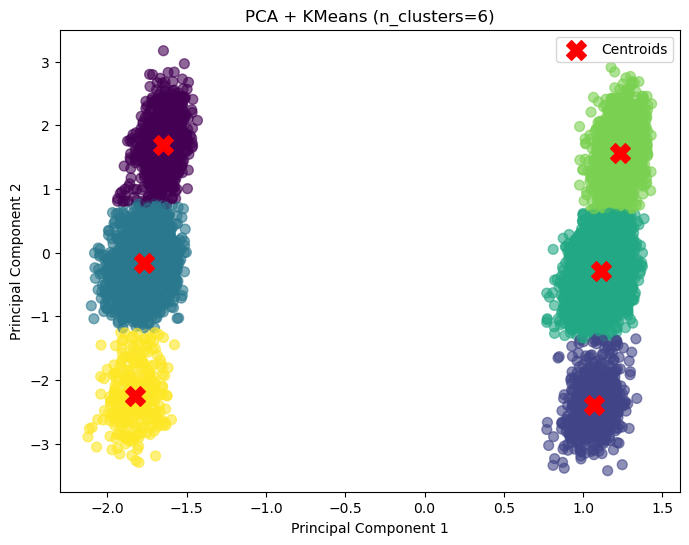

In [ ]:
# Plotting the PCA results with KMeans cluster labels
plt.figure(figsize=(8, 6))

# Plot the first two principal components
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)

# Marking the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, label='Centroids')

# Adding title and labels
plt.title(f'PCA + KMeans (n_clusters={best_k_for_best})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


In [35]:
# Copy df_pca to df_labels
df_labels = df_original.copy()

# Add the cluster labels (which is an array) to the new df_labels DataFrame
df_labels['Cluster_Label'] = labels

# Now df_labels contains the cluster labels without modifying df_pca
print(df_labels.head())


   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  ...  TimeOnSite  \
0          0.043919        0.088031              0  ...    7.396803   
1          0.155725        0.182725             42  ...    5.352549   
2          0.277490        0.076423              2  ...   13.794901   
3          0.137611        0.088004             47  ...   14.688363   
4          0.252851        0.109940              0  ...   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            1

## 5. Evaluate Features of Different Segment

In [24]:
# 1. Get centroids in PCA-transformed space
pca_centroids = kmeans.cluster_centers_

# 2. Inverse transform using the correct PCA model
centroids_standardized = pca_best.inverse_transform(pca_centroids)  # Use pca_best, not pca

# 3. Reverse standardization to map back to original feature space
centroids_original = centroids_standardized * scalar.scale_ + scalar.mean_

# 4. Create DataFrame for better readability
centroids_df = pd.DataFrame(centroids_original, columns=df_encoded.columns)

# 5. Add cluster labels (0, 1, ..., k-1)
centroids_df.insert(0, 'Cluster', range(best_k_for_best))

# 6. Display results
print("Final Cluster Centroids in Original Feature Space:")
print(centroids_df.round(2))

Final Cluster Centroids in Original Feature Space:
   Cluster    Age    Income  AdSpend  ClickThroughRate  ConversionRate  \
0        0  44.10  82281.07  5610.29              0.17            0.12   
1        1  42.66  85308.10  4123.82              0.13            0.09   
2        2  43.14  80725.35  4917.23              0.15            0.10   
3        3  43.73  86868.75  4906.33              0.15            0.10   
4        4  44.70  88427.35  5600.26              0.17            0.11   
5        5  42.08  79152.35  4138.82              0.13            0.09   

   WebsiteVisits  PagesPerVisit  TimeOnSite  SocialShares  ...  Gender_Male  \
0          26.05           5.99        8.80         48.45  ...         0.99   
1          22.98           4.92        6.10         51.93  ...        -0.01   
2          24.73           5.51        7.45         50.28  ...         1.00   
3          24.48           5.47        7.62         49.88  ...         0.01   
4          25.81           5.96    

splitt based on categorical and numerical

In [49]:
check_cat = df_labels.select_dtypes(include=['object', 'category'])  # Categorical columnsc
check_num= df_labels.select_dtypes(include=['number'])  # Numerical columns
check_cat["Cluster_Label"] = df_labels["Cluster_Label"]
check_num["Cluster_Label"] = df_labels["Cluster_Label"]
summary_stats = check_num.groupby('Cluster_Label').agg(['mean'])
summary_stats

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster_Label,,,,,,,,,,,,,,,
0,11874.606952,43.975936,83118.402406,5103.889242,0.160125,0.108279,24.383690,5.600666,8.052900,50.477273,9.596257,4.823529,4.711230,2581.030749,1.000000
1,13018.227533,43.449331,83516.326960,3828.730274,0.125252,0.089418,21.405354,4.873681,5.884563,51.200765,7.801147,3.447419,3.414914,2103.126195,0.011472
2,11880.653865,43.313490,82868.022564,5093.838890,0.157882,0.106172,25.375420,5.667805,7.742781,49.688910,9.641383,4.572252,4.548248,2531.552088,0.968315
3,11920.409536,43.675376,86642.144350,5178.631914,0.158158,0.105990,25.304376,5.635073,8.008285,50.022534,9.639778,4.525147,4.551274,2520.348138,0.973547
4,11822.059011,44.066188,85169.217703,5071.923809,0.159188,0.105696,24.736045,5.614727,7.997754,48.354067,10.070973,4.681021,4.740032,2557.686603,0.999203
5,12826.372727,42.942424,81052.830303,4120.587190,0.122972,0.088219,21.881818,4.711097,6.187224,50.169697,7.054545,3.266667,3.696970,2102.224242,0.021212


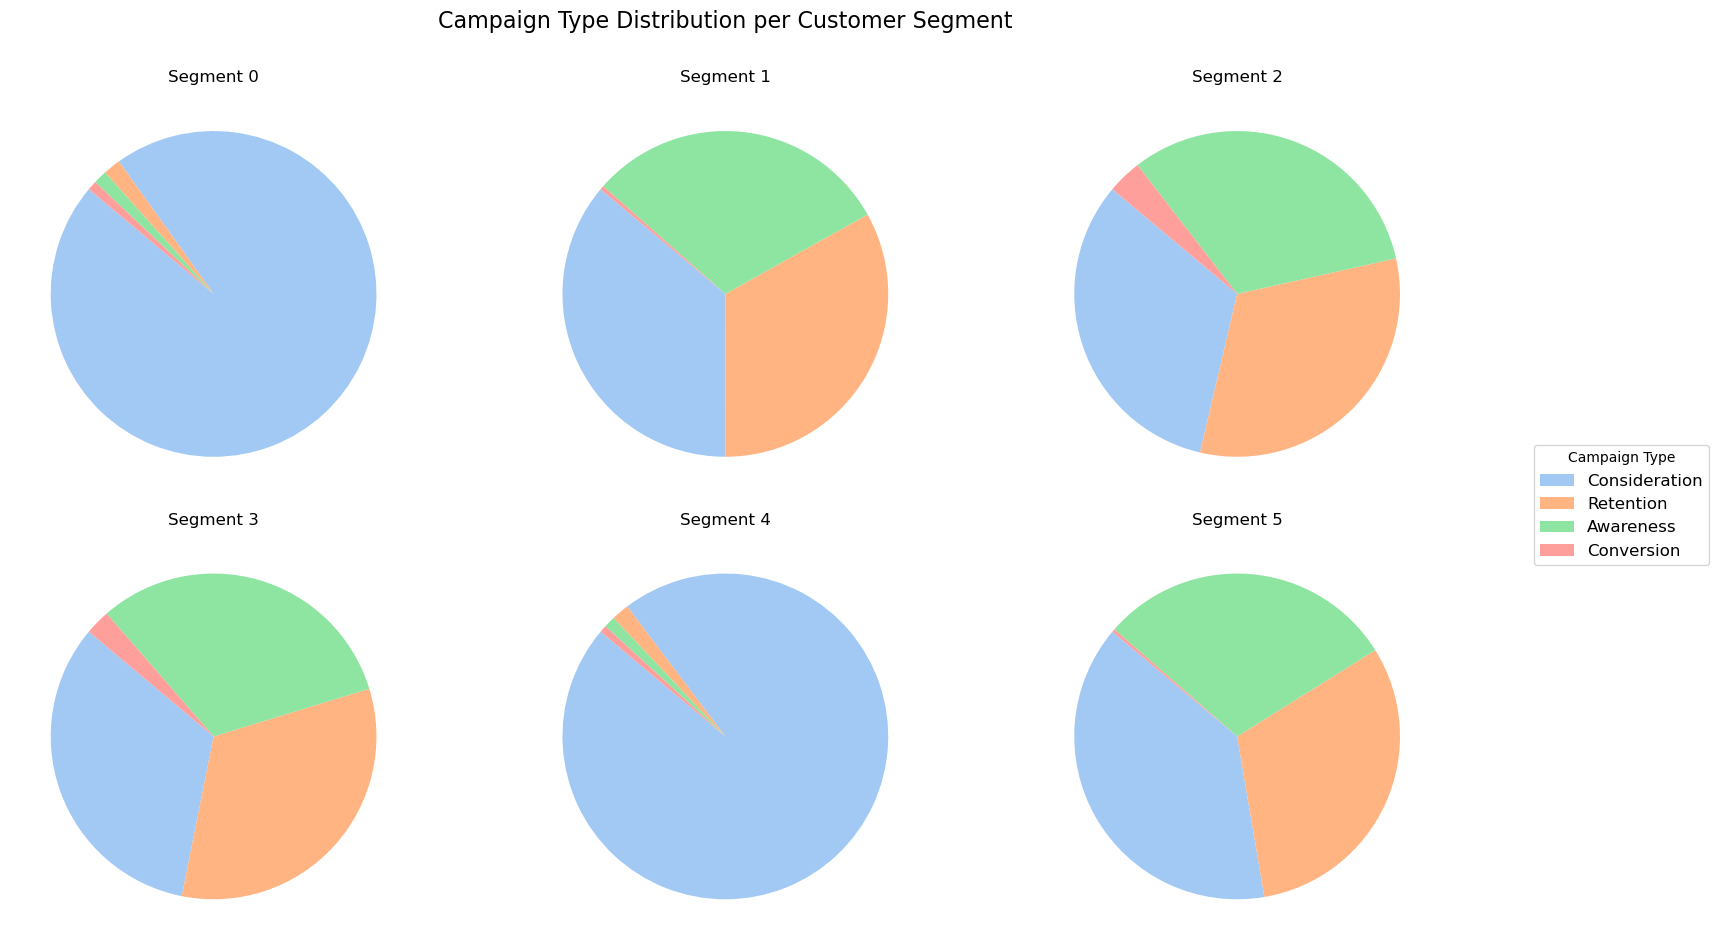

In [42]:
colors = sns.color_palette("pastel")

# Get unique clusters
clusters = check_cat['Cluster_Label'].unique()
clusters.sort()

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=(len(clusters) + 1) // 2, figsize=(16, 9))

for i, cluster in enumerate(clusters):
    ax = axes.flatten()[i]
    cluster_data = check_cat[check_cat['Cluster_Label'] == cluster]
    campaign_counts = cluster_data['CampaignType'].value_counts()

    # Plot pie without labels, use colors
    wedges, texts = ax.pie(campaign_counts, colors=colors, startangle=140)
    ax.set_title(f'Segment {cluster}', fontsize=12)

# Remove extra unused subplots (if any)
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

# Add one common legend (outside the plot)
fig.legend(wedges, campaign_counts.index, title='Campaign Type',
           loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()
plt.suptitle('Campaign Type Distribution per Customer Segment', fontsize=16, y=1.05)
plt.show()


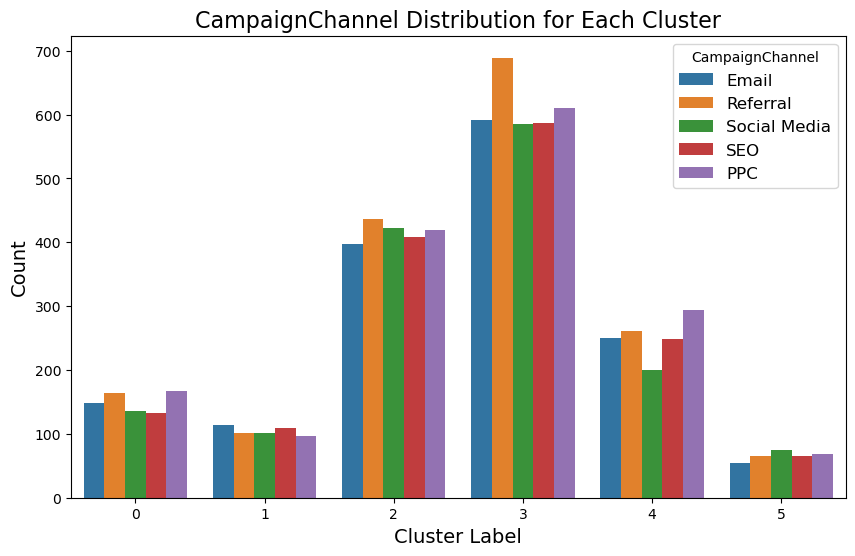

In [43]:

plt.figure(figsize=(10, 6))
sns.countplot(data=check_cat, x='Cluster_Label', hue='CampaignChannel')

# Add labels and title
plt.title('CampaignChannel Distribution for Each Cluster', fontsize=16)
plt.xlabel('Cluster Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='CampaignChannel', fontsize=12)

# Display the plot
plt.show()

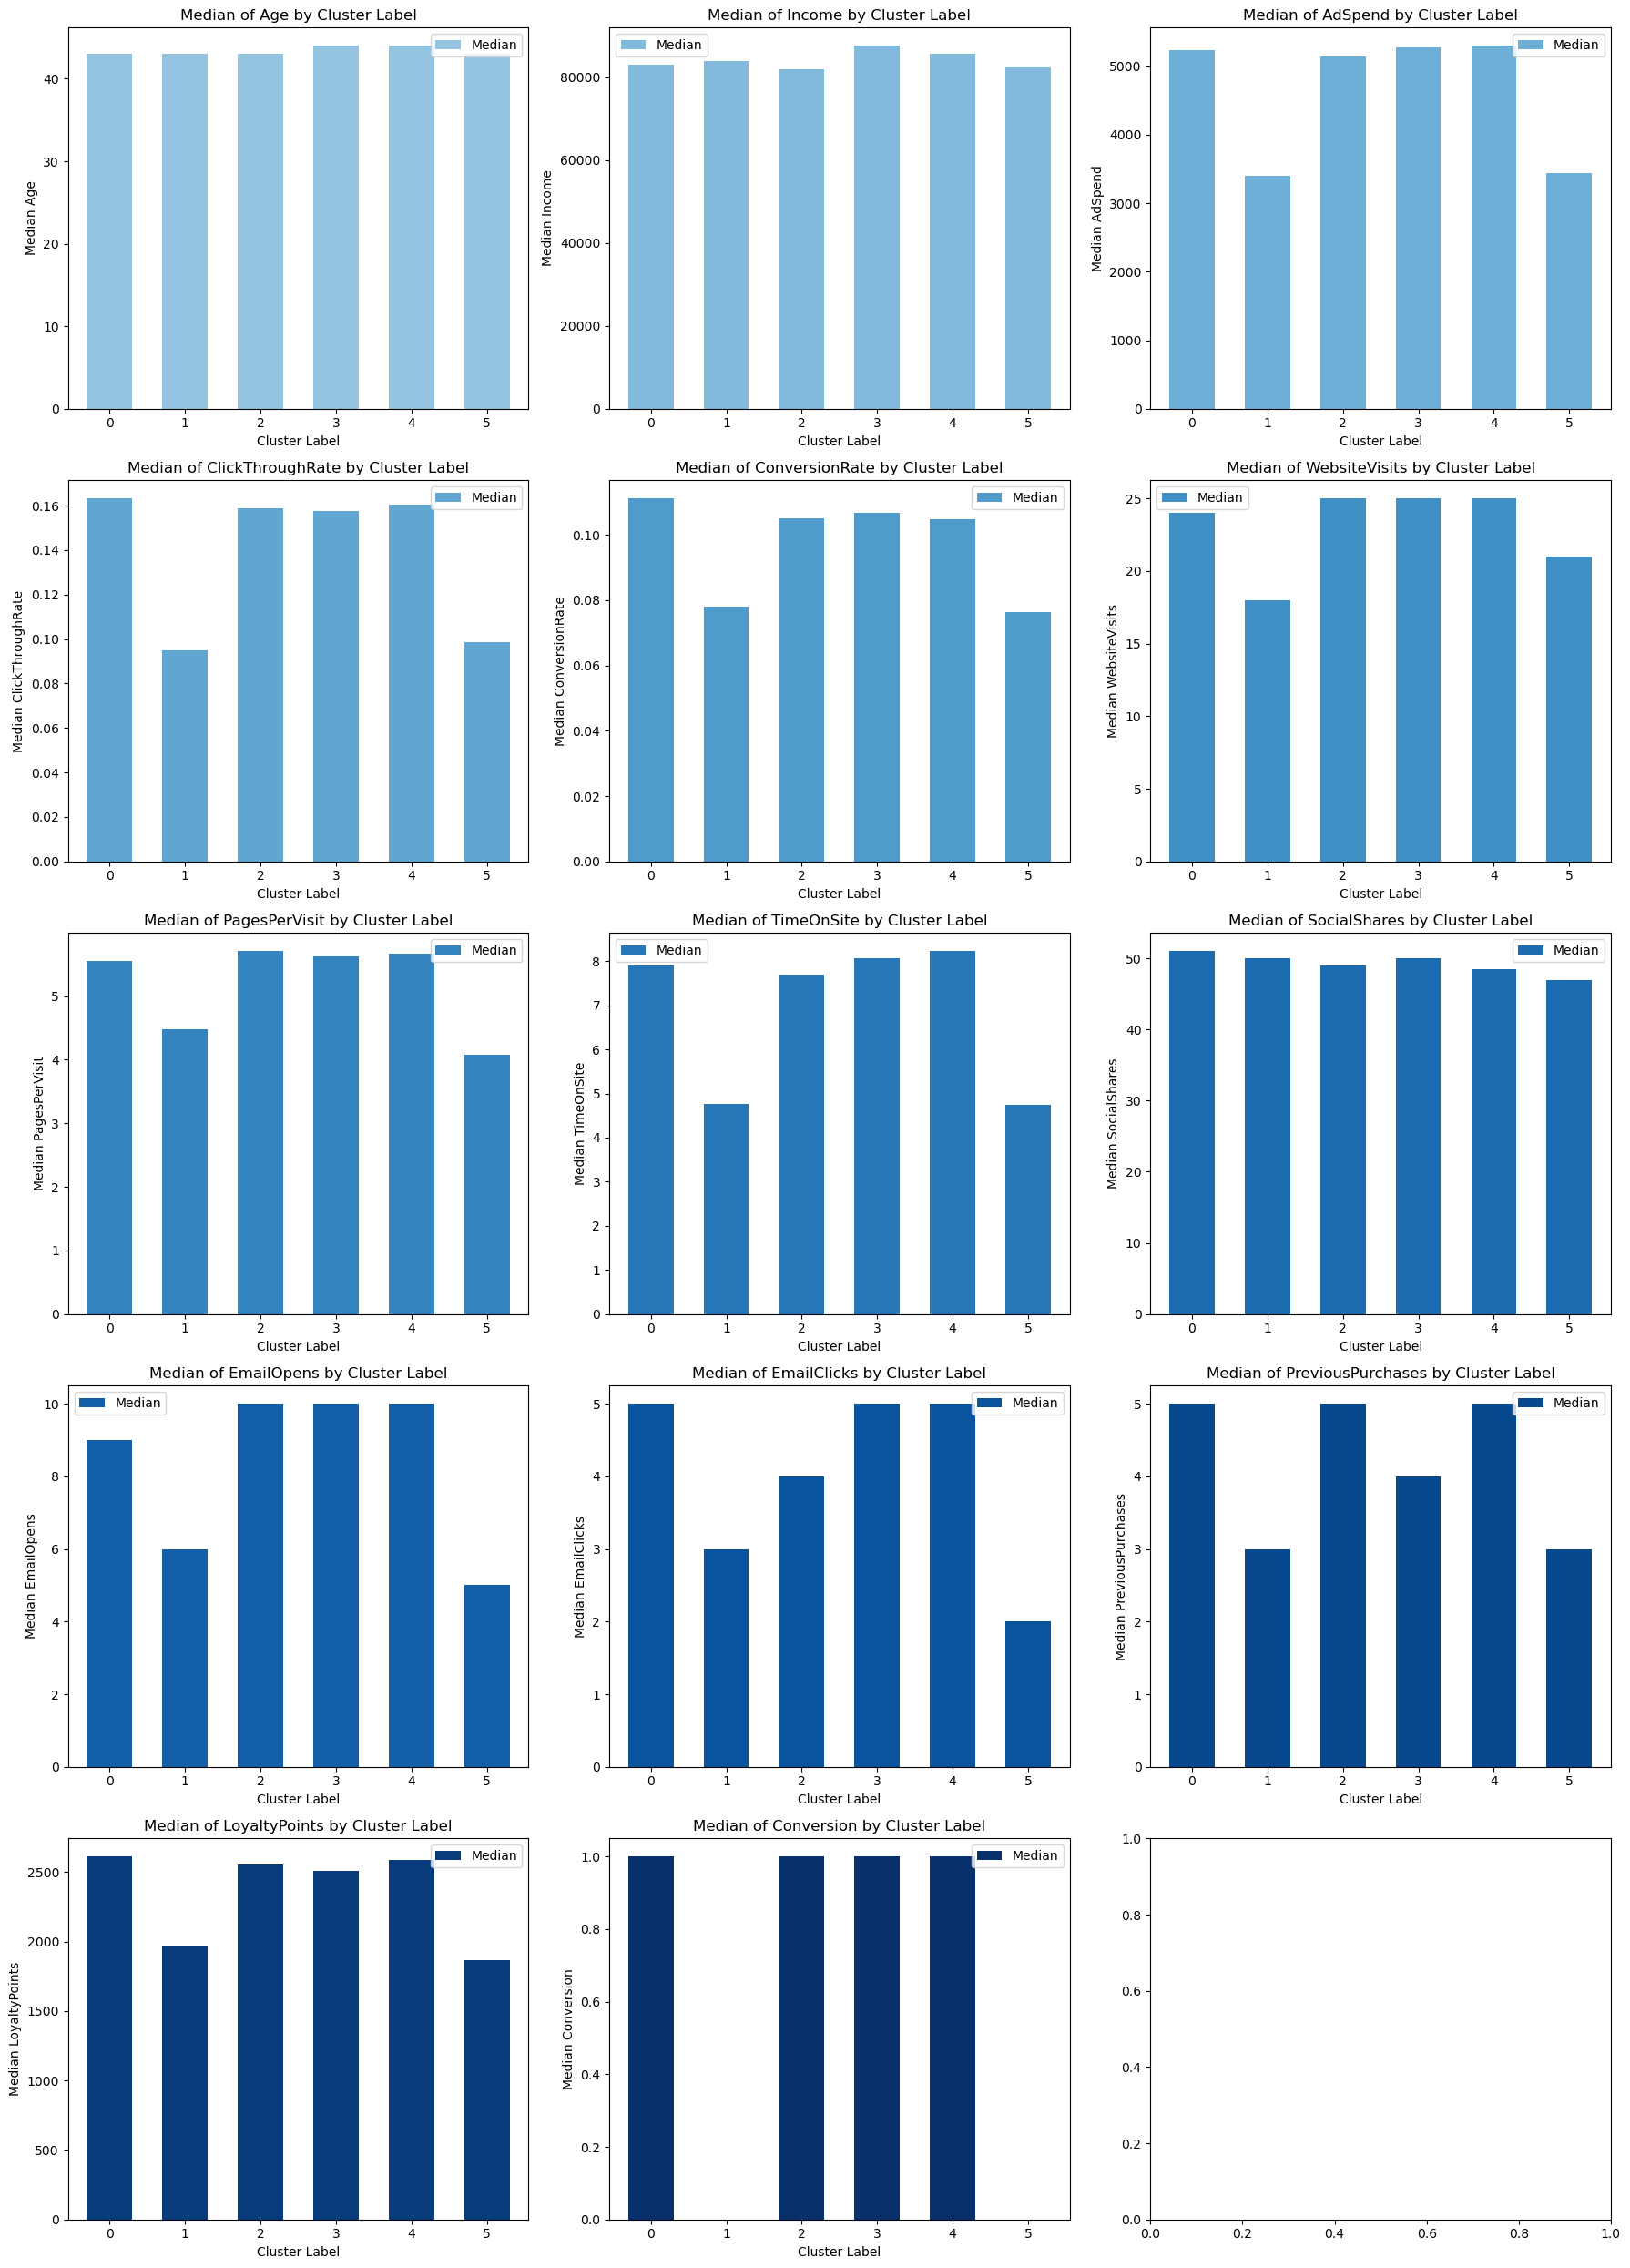

In [48]:

# Define the columns you want to plot (only numerical columns, excluding 'Cluster_Label' and 'CustomerID')
numerical_columns = check_num.select_dtypes(include='number').columns

# Exclude 'Cluster_Label' and 'CustomerID' from the list of columns to be plotted
numerical_columns = [col for col in numerical_columns if col not in ['Cluster_Label', 'CustomerID']]

# Calculate the number of rows needed (3 columns per row)
num_rows = np.ceil(len(numerical_columns) / 3).astype(int)

# Set up the figure and axes (3 plots per row)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 5))

# Flatten the axes array to easily loop through
axes = axes.flatten()

# Set up a color map for contrasting colors for median bars
median_colors = plt.cm.Blues(np.linspace(0.4, 1, len(numerical_columns)))  # Blue shades for Median

# Loop through numerical columns to plot
for i, column in enumerate(numerical_columns):
    # Calculate median per Cluster_Label
    median_by_cluster = check_num.groupby('Cluster_Label')[column].median()

    # Plot the median bars with contrasting blue color
    median_by_cluster.plot(kind='bar', color=median_colors[i], ax=axes[i], width=0.6, label='Median')

    # Set titles and labels
    axes[i].set_title(f'Median of {column} by Cluster Label', fontsize=12)
    axes[i].set_xlabel('Cluster Label', fontsize=10)
    axes[i].set_ylabel(f'Median {column}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



Cluster 0: Most high value customers, high overall engagement and loyalty

Cluster 1: Most low value customers, with less ad spend and low digital engagement (email, website, pages)

Cluster 2: High value customers, moderate digital engagement

Clutser 3: Relatively higher Income, high digital engagement, previous purchases not very high compared to other high value groups

Clutser 4: Relatively high value customers, highly engaged in email but lower social shares

Clutser 5: Low value customers Relatively lower income

